In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

This week, we'll be looking at a dataset showing the housing values in the suburbs of Boston. Every row is a different town.

## Housing Values in Suburbs of Boston

The medv variable is the target variable.

Data description  
The Boston data frame has **506 rows and 14 columns**.

This data frame contains the following columns:

**crim**  
per capita crime rate by town.

**zn**  
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**  
proportion of non-retail business acres per town.

**chas**  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**  
nitrogen oxides concentration (parts per 10 million).

**rm**  
average number of rooms per dwelling.

**age**  
proportion of owner-occupied units built prior to 1940.

**dis**  
weighted mean of distances to five Boston employment centres.

**rad**  
index of accessibility to radial highways.

**tax**  
full-value property-tax rate per $10,000.

**ptratio**   
pupil-teacher ratio by town.

**lstat**  
lower status of the population (percent).

**medv**  
median value of owner-occupied homes in $1000s.

I've also added:  

**RM_Discrete**  
1 if average number of rooms per dwelling is greater than 7, 0 if it's 7 or less

In [2]:
boston = pd.read_csv('data/boston_dataset.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,RM_Discrete
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1


1) First, let's look at the relationship between the RM variable and MEDV. How does the number of rooms per dwelling impact the median value of a home in a given town?

Create a scatterplot between these two variables. Does this look like a strong correlation? Does the relationship look linear?

Text(0.5, 0.92, 'Relationship Between Number of Rooms and Median Home Value')

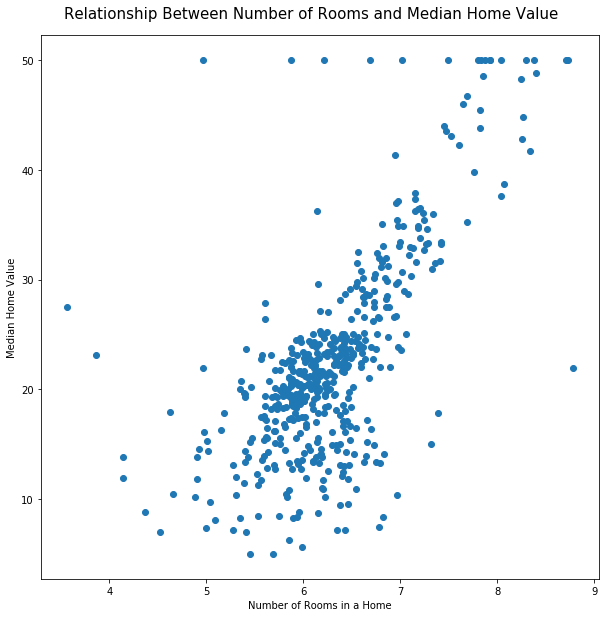

In [3]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM'], boston['MEDV'])
plt.xlabel('Number of Rooms in a Home')
plt.ylabel('Median Home Value')
fig.suptitle('Relationship Between Number of Rooms and Median Home Value', fontsize=15, y=0.92)

The relationship looks decently strong and linear.

2) What is the correlation between these two variables?

In [4]:
stats.pearsonr(boston['RM'], boston['MEDV'])[0]

0.6953599470715394

3) Now fit a regression between these two variables. What is the slope? What is the intercept? What is the R-squared value? Given the R-squared value, how well would you say the number of rooms can help you predict what the price of a home will be? Please use the 'evaluate linear relationship' function.

In [5]:
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(boston['RM'], boston['MEDV'])

In [6]:
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 9.102108981180306
Intercept: -34.67062077643854


In [7]:
utils.get_r2(predictions, boston['MEDV'])

0.48352545599133323

The R-squared value is relatively low - the number of rooms isn't a great predictor of the median value of a home.

4) Now re-run this using the statsmodels OLS function (smf.ols). Are the results (slope, intercept, r-squared value) the same?

In [8]:
est = smf.ols('MEDV ~ RM', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        21:42:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, the slope, intercept, and R-squared value are all the same.

5) Now fit a regression between the 'RM_Discrete' variable and the 'MEDV' variable. What is the slope? What is the intercept? What is the interpretation of the slope? What is the R-squared value? Given the R-squared value, how well would you say this binary predictor can help you predict what the price of a home will be?

In [9]:
slope_discrete, intercept_discrete, predictions_discrete, residuals_discrete = utils.evaluate_linear_relationship(boston['RM_Discrete'], boston['MEDV'])

In [10]:
print('Slope:', slope_discrete)
print('Intercept:', intercept_discrete)

Slope: 18.16112839366516
Intercept: 20.235746606334846


If a home has more than 7 rooms, it is predicted to be worth $20,000 more than a home that has less than 7 rooms.

In [11]:
utils.get_r2(predictions_discrete, boston['MEDV'])

0.4316619841971687

The R-squared value is relatively low - the number of rooms isn't a great predictor of the median value of a home.

6) Plot the residuals plot for this relationship. Do the residuals look heteroskedastic (not evenly distributed) or homoskedastic (evently distributed)? Remember that values will only show up as 0 or 1 on the x-axis, you are only looking at the distribution on the y-axis.

Text(0.5, 0.92, 'Relationship Between Number of Rooms and Median Home Value')

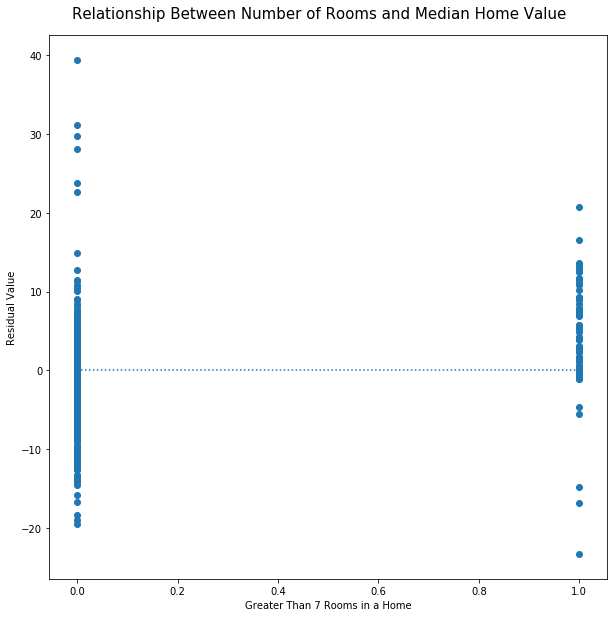

In [12]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM_Discrete'], residuals)
sorted_order = np.argsort(boston['RM_Discrete'])
plt.plot([boston['RM_Discrete'].min(), boston['RM_Discrete'].max()], [0,0], linestyle='dotted')
plt.xlabel('Greater Than 7 Rooms in a Home')
plt.ylabel('Residual Value')
fig.suptitle('Relationship Between Number of Rooms and Median Home Value', fontsize=15, y=0.92)

There looks to be slightly more variablity in the residuals when the RM Discrete variable is 0 rather than when it is 1.

7) Now let's look at the relationship between the 'LSAT' and 'MEDV' variable. How does the percentage of the 'lower status' of a population in a given town affect the median value of a home in that town?

Create a scatterplot between these two variables. Does this look like a strong correlation? Does the relationship look linear?

Text(0.5, 0.92, 'Relationship Between Number of Rooms and Median Home Value')

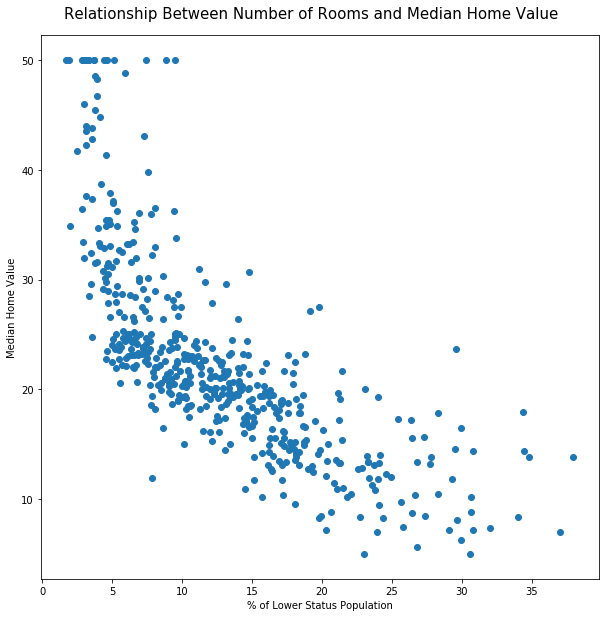

In [13]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['LSTAT'], boston['MEDV'])
plt.xlabel('% of Lower Status Population')
plt.ylabel('Median Home Value')
fig.suptitle('Relationship Between Number of Rooms and Median Home Value', fontsize=15, y=0.92)

The relationship between these two looks to be negative but not necessarily linear.

8) Now evaluate the RMSE between the relationship between the 'LSTAT' and 'MEDV' columns for the polynomials 1 through 20. Which degree of polynomial has the lowest corresponding RMSE?

In [14]:
polynomials = []
rmse_values = []
for i in range(1, 21):
    polynomials.append(i)
    variables = np.polyfit(boston['LSTAT'], boston['MEDV'], i)
    function = np.poly1d(variables)
    predictions = function(boston['LSTAT'])
    rmse_values.append(utils.get_rmse(predictions, boston['MEDV']))
df = pd.DataFrame()
df['polynomials'] = polynomials
df['rmse'] = rmse_values
df

/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


,polynomials,rmse
0,1,6.203464
1,2,5.507315
2,3,5.374416
3,4,5.253963
4,5,5.183783
5,6,5.175702
6,7,5.174982
7,8,5.166326
8,9,5.152759
9,10,5.142430


In [15]:
df[df['rmse'] == df['rmse'].min()]

,polynomials,rmse
19,20,5.063102


The 20th polynomial has the lowest RMSE of 5.06.

9) Now split the dataset into training and testing sets like we did in class, and evaluate the RMSE for both the training and testing sets. Plot a graph showing the corresponding RMSE values for the training and testing sets. At what degree polynomial do we approximately have the RMSE for the training and testing sets? Remember that we are not looking for the absolute lowest values necessarily, just the point at which the RMSE doesn't seem to be notably improving any further, and certainly not going higher in either the training or testing sets. Feel free to use both a dataframe and graph to analyze this.

In [16]:
x_train, x_test, y_train, y_test = utils.get_train_test(boston['LSTAT'], boston['MEDV'])

In [17]:
polynomials = []
train_rmse = []
test_rmse = []
for i in range(1, 20):
    polynomials.append(i)
    variables = np.polyfit(x_train, y_train, i)
    function = np.poly1d(variables)
    train_predictions = function(x_train)
    train_rmse.append(utils.get_rmse(train_predictions, y_train))
    test_predictions = function(x_test)
    test_rmse.append(utils.get_rmse(test_predictions, y_test))
df = pd.DataFrame()
df['polynomials'] = polynomials
df['train_rmse'] = train_rmse
df['test_rmse'] = test_rmse

/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


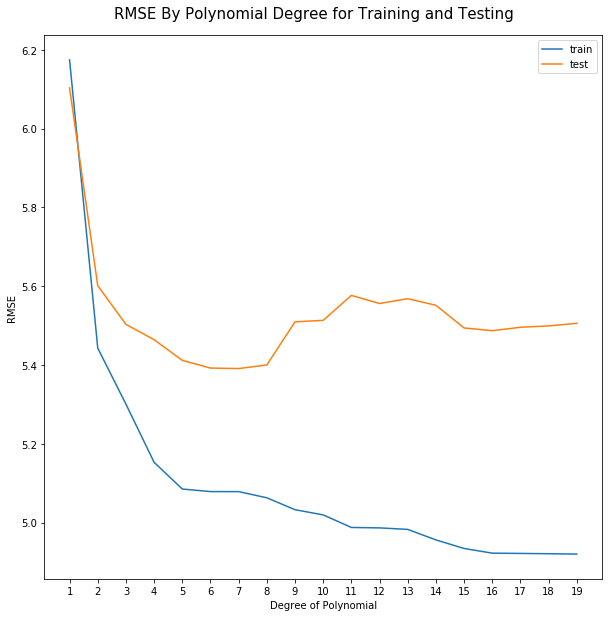

In [18]:
fig = plt.figure(figsize=(10,10))
plt.plot(df['polynomials'], df['train_rmse'], label='train')
plt.plot(df['polynomials'], df['test_rmse'], label='test')
plt.xticks(range(1,20))
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
fig.suptitle('RMSE By Polynomial Degree for Training and Testing', fontsize=15, y=0.92)
plt.legend()

We are probably safe using the fifth polynomial, as the RMSE doesn't seem to improve much in the testing set after that.

10) Using seaborn's 'pairplot' function, run a pairplot of this dataset and look at the relationship between the 'MEDV' variable and the other continuous varibles in the dataset. Which variables does MEDV look to have the strongest (positive) correlation with?

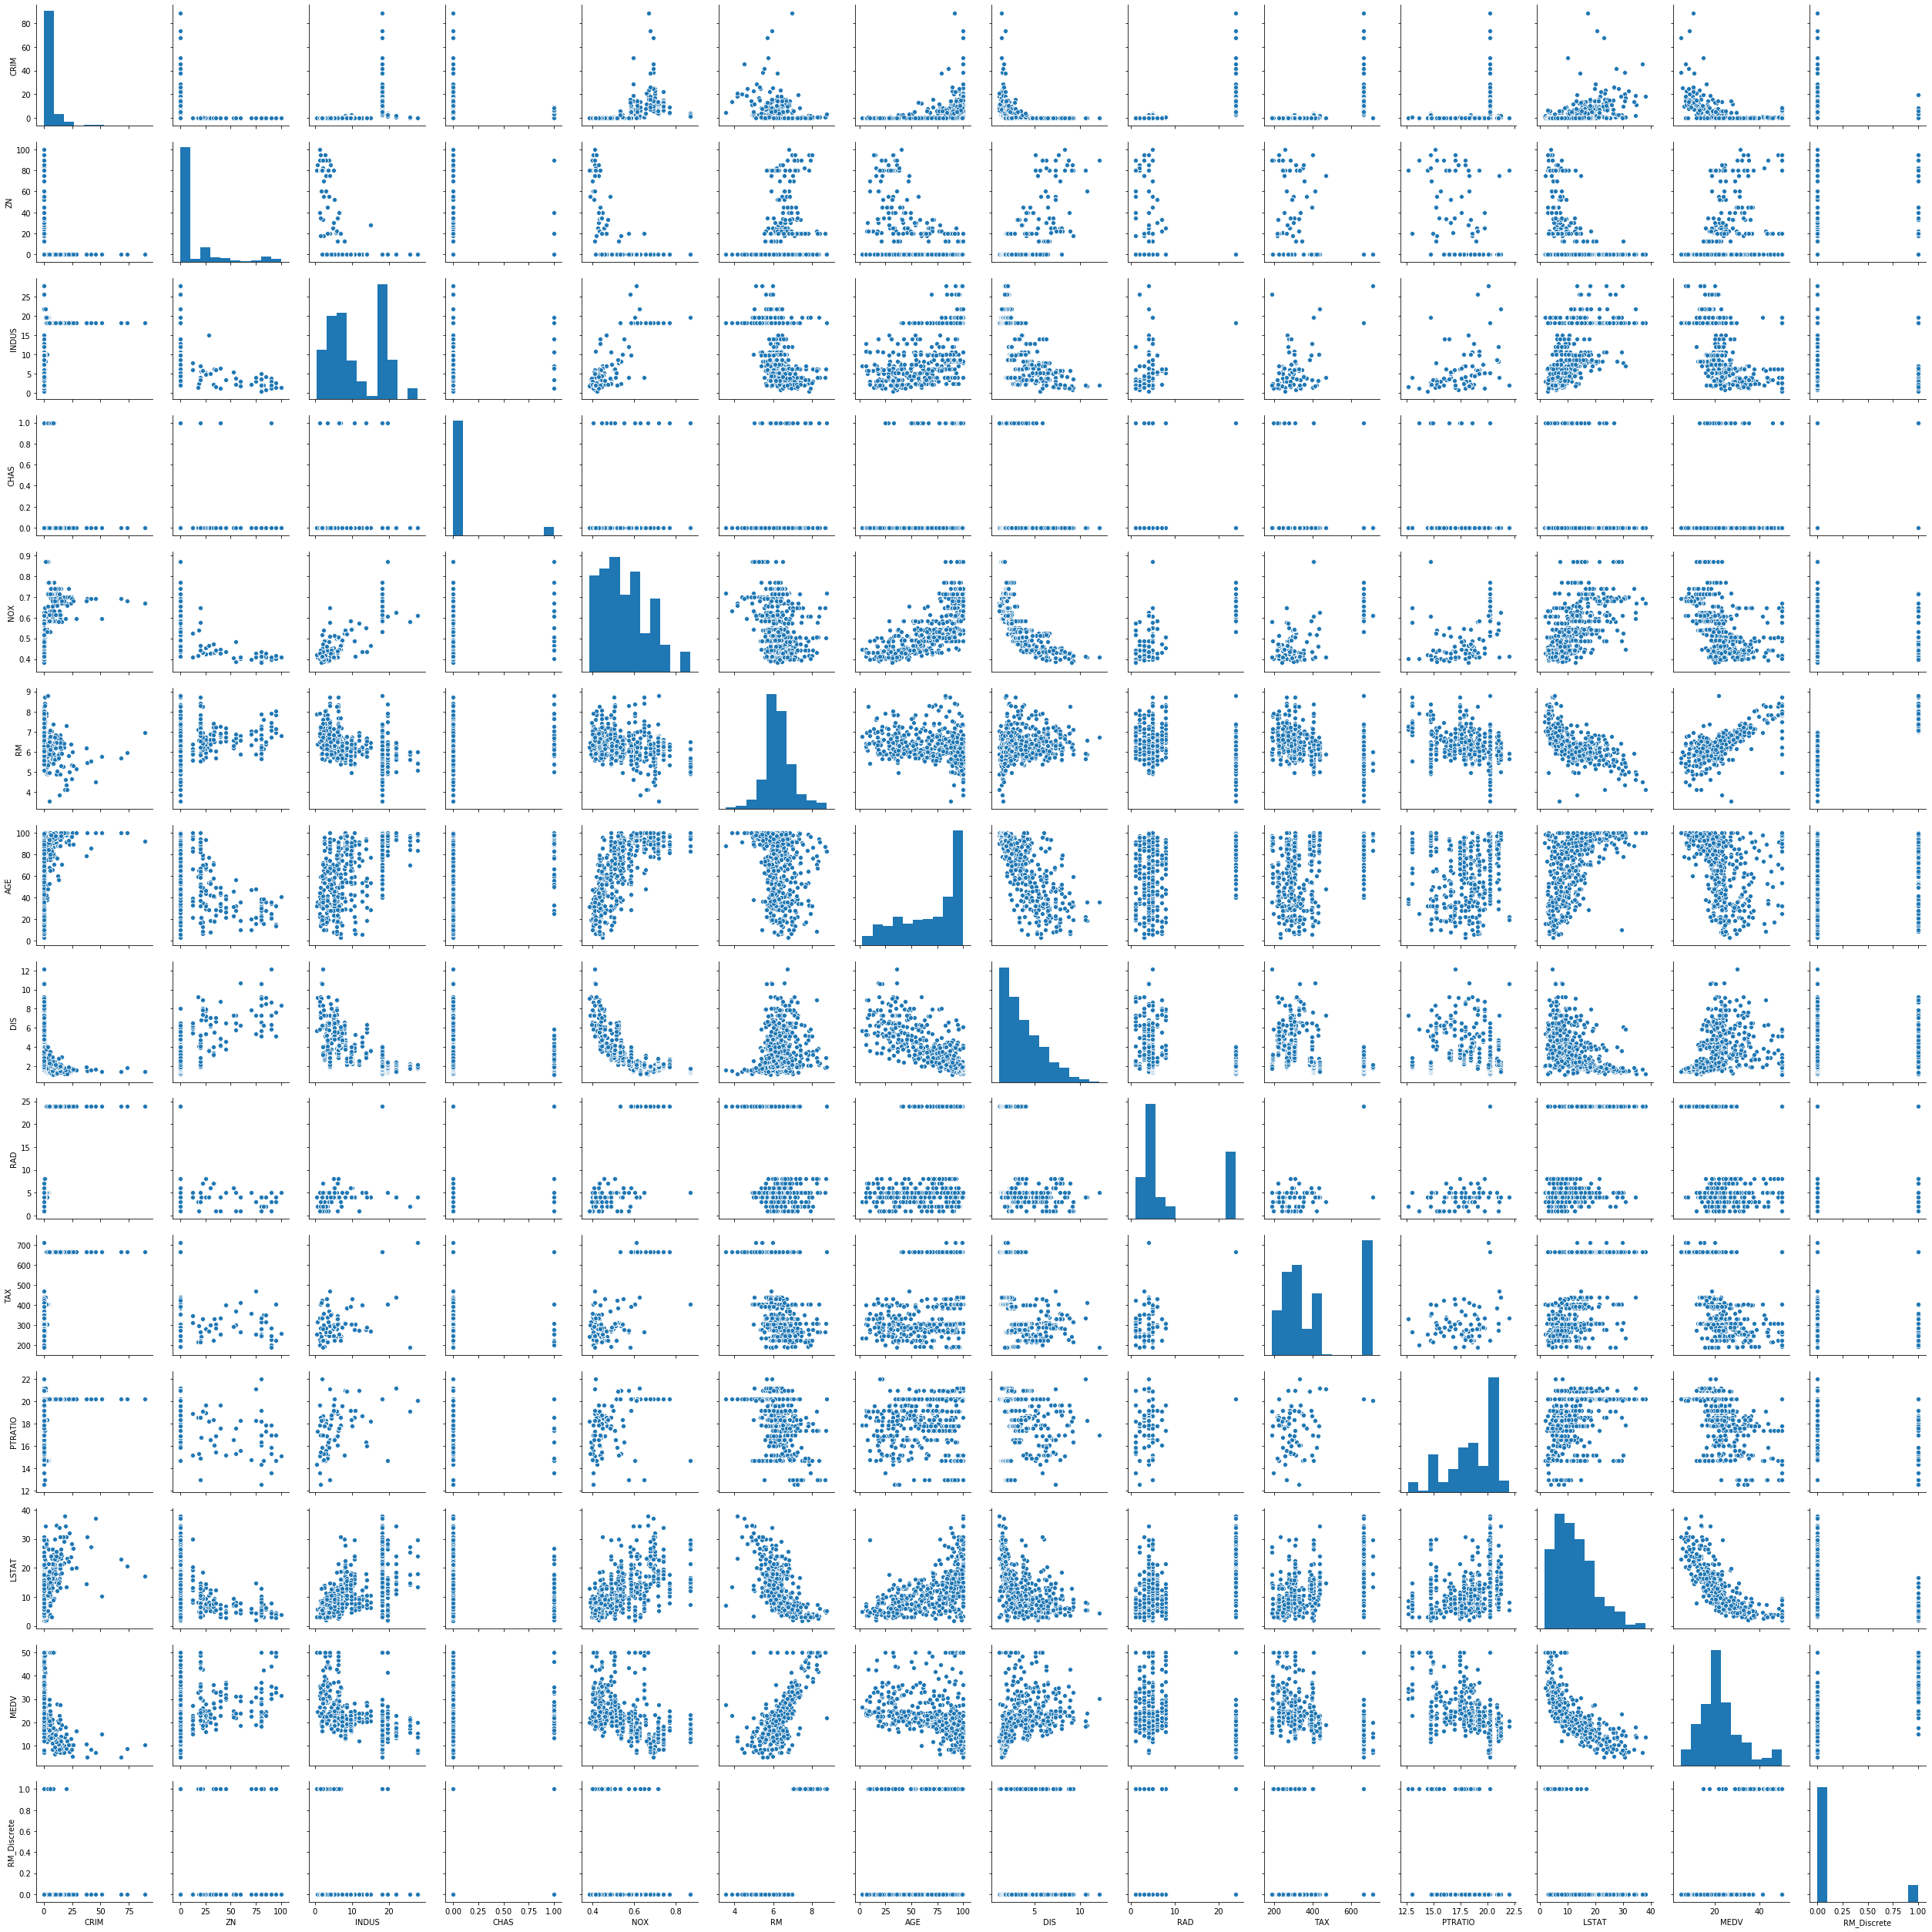

In [19]:
sns.pairplot(boston)

The MEDV variable looks to have the strongest positive correlation with the RM variable, which we previously covered.

BONUS: 11) Now run a multivariate regression using the following variables as predictors:

ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

Against MEDV as a response variable.

Which of these varibles have a statistically significant slope? What is the total R-squared value of the model?

In [21]:
est = smf.ols('MEDV ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT', boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          1.50e-131
Time:                        21:43:29   Log-Likelihood:                -1511.8
No. Observations:                 506   AIC:                             3048.
Df Residuals:                     494   BIC:                             3098.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0410      4.996      8.215      0.000      31.226      50.857
ZN             0.0426      0.014      3.039      0.002       0.015       0.070
INDUS          0.0211      0.063      0.336      0.737      -0.102       0.145
CHAS           3.0209      0.880      3.435      0.001       1.293       4.749
NOX          -18.0309      3.895     -4.630      0.000     -25.683     -10.379
RM             3.6801      0.425      8.649      0.000       2.844       4.516
AGE            0.0038      0.013      0.283      0.778      -0.023       0.030
DIS           -1.4054      0.203     -6.930      0.000      -1.804      -1.007
RAD            0.2210      0.065      3.395      0.001       0.093       0.349
TAX           -0.0126      0.004     -3.263      0.001      -0.020      -0.005
PTRATIO       -0.9253      0.134     -6.914      0.000      -1.188      -0.662
LSTAT         -0.5845      0.051    -11.571      0.000      -0.684      -0.485
==============================================================================
Omnibus:                      164.653   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.839
Skew:                           1.416   Prob(JB):                    8.72e-149
Kurtosis:                       7.932   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All of these variables besides AGE and INDUS are statistically significant. The overall R-squared value of the model is 0.727.